# Outlier Detection

### Boxplot

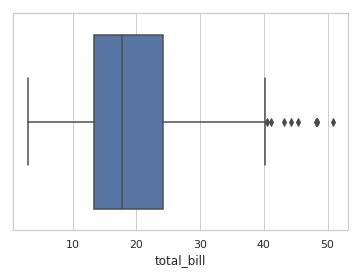

In [41]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

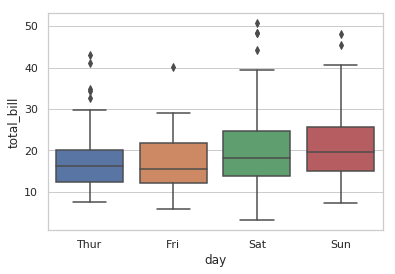

In [42]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

### Distribution plotting

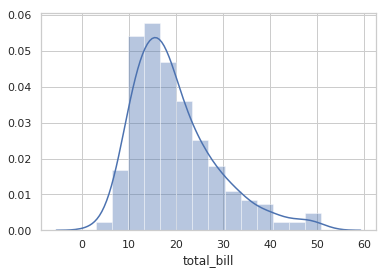

In [44]:
sns.distplot(tips["total_bill"]);


# Unsupervised ML algorythms 
### Local Outlier Factor

Automatically created module for IPython interactive environment
15


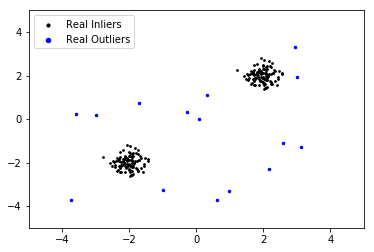

In [7]:
#Lets first generate a dataset with clear outliers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

np.random.seed(42)

# Generate the inliers
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

#Generate some outliers, uniformly distributed, but distant from the inliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
true_out=np.logical_and(np.linalg.norm(X_outliers-[2,2],axis=1)>1, np.linalg.norm(X_outliers-[-2, -2],axis=1)>1)
X_outliers=X_outliers[true_out]
print(len(X_outliers))

#Lets plot them!
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='k', s=3., label='Real Inliers')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='b', s=6., label='Real Outliers')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [8]:
# We normally DO NOT KNOW wich are the outliers (otherwise will be easy ;) )
# Lets combine them in
X = np.r_[X_inliers, X_outliers]

# fit the model for outlier detection (default)
# In the algorythm we have to give an estimation of the contamination 
# We usually do not know also the contamination... 
# So guessing?!? Let's give 0.02?!?
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)

outl_vec = clf.fit_predict(X)
print(outl_vec) # vector where -1 is an outlier

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1]


In [9]:
#We can obtain the outlier simply 
found_outl=X[outl_vec==-1]
found_outl

array([[ 3.12004273, -1.29603875],
       [ 0.62624113, -3.71246181],
       [ 2.58080449, -1.11847487],
       [ 0.98312381, -3.31722028],
       [-3.58654623,  0.25083705]])

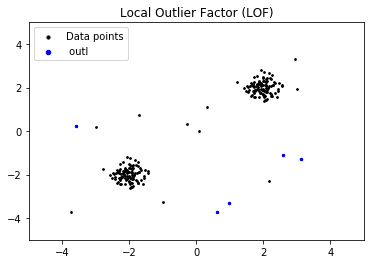

In [11]:
#Let's plot!
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(found_outl[:, 0], found_outl[:, 1], color='b', s=6., label=' Founded outl')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

In [12]:
# We are missing some!
# Since this is a toy dataset we can also know how many.
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1
n_errors = (outl_vec != ground_truth).sum()
print(n_errors)

10


One way can be to inspect visually the plotted data and change the contamination parameter.
It is a higly inefficient way, and is possible only for low dimension (less or equal to 4)!

How can we do?
The algorithm infer the outliers based on an outlier score calculated for each point.

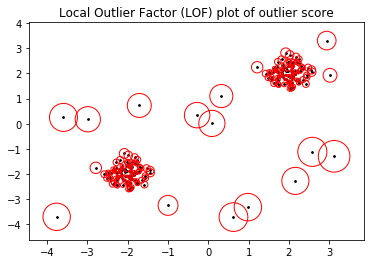

In [13]:
#Let see this score:
X_scores = clf.negative_outlier_factor_


# Plot datapoint and circles with radius proportional to the point outlier scores
plt.title("Local Outlier Factor (LOF) plot of outlier score")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

It is quite easy to see that real outliers have far more outlier score!
Maybe we can have an insight on the real outliers looking to the outliers score.

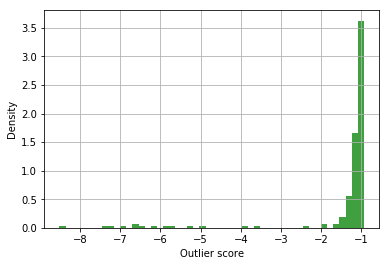

In [14]:
#Let's plot the histogram of X_scores

import numpy as np
import matplotlib.pyplot as plt


# the histogram of the data
n, bins, patches = plt.hist(X_scores, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Outlier score')
plt.ylabel('Density')
plt.title('')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()


It is quite easy to see that the bulk of observation is above -2.
We can decide to set that value to be the threshold for the outliers.

15


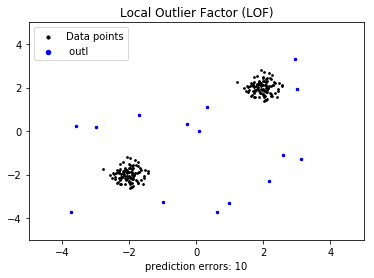

In [16]:
# Let see the predicted outliers:
found_outl=X[X_scores<-2]
print(len(found_outl))
clf.fit_predict

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(found_outl[:, 0], found_outl[:, 1], color='b', s=6., label=' outl')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

### Recap

Good way of detecting outliers:

- We fit the local outlier factor on the data
- We plot the outlier score
- We see if there is a threshold between inliers and outliers
- Use that for predicting the outliers

# Isolation forest
The procedure before can be applied also with the Isolation forest algorythm.

In [47]:
# Isolation Forest ----
# Isolation forest is randomic, this means that every time you run it you will find 
# different values.

rng = np.random.RandomState(40)

from sklearn.ensemble import IsolationForest

# define the algorythm
clf = IsolationForest(max_samples=100, random_state=rng,behaviour='new',contamination='auto')


In [48]:
# Isolation forest has also a method for auto detection of the outliers...
# My advice is not to trust it so much.
clf.fit(X)
sa=clf.predict(X)
def find_out(el):
    if el==-1:
        el=True
    else:
        el=False
    return el

ou=list(map(find_out, sa))
X_outliers=X[ou]

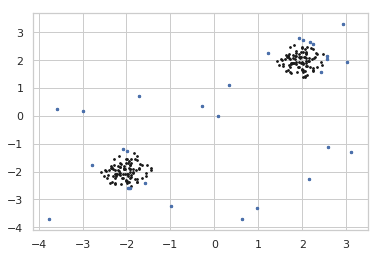

In [49]:
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='b', s=6., label=' outl')


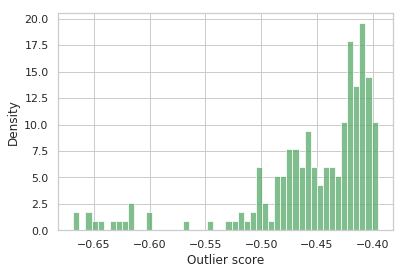

In [50]:
# Let's do as done before with the LOC algorythm

X_scores=clf.score_samples(X)
# the histogram of the data
n, bins, patches = plt.hist(X_scores, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Outlier score')
plt.ylabel('Density')
plt.title('')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()


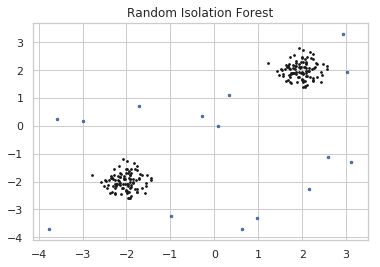

In [51]:
plt.title("Random Isolation Forest")

my_Xou=X[X_scores<-0.55]

plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
plt.scatter(my_Xou[:, 0], my_Xou[:, 1], color='b', s=6., label=' outl')
# plot circles with radius proportional to the outlier scores


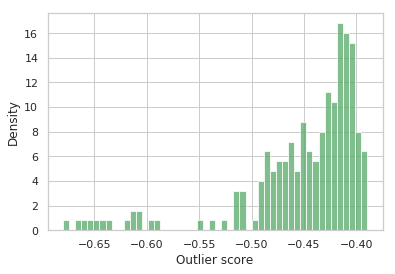

In [53]:
# Just to show, if you run again the algorythm now you will obtain sligthly different 
# results.
clf.fit(X)

X_scores=clf.score_samples(X)
# the histogram of the data
n, bins, patches = plt.hist(X_scores, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Outlier score')
plt.ylabel('Density')
plt.title('')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

Thats why it is important to initialize the random state: reproducibility of your results!
Imagine your boss asking you: show me this incredible results..... can be an epic fail!
